# Modelo de crecimiento logístico aplicado en la evolución del Covid-19

* Se aplica el modelo de crecimiento logistico modificado del modelo de P.F. VERHULST 
* El objetivo de aplicar este algoritmo es el de obtener un modelo predictivo, asi como los valores de sus coeficientes
* Se pretende obtener la derivada del modelo, para analizar los diferentes puntos de inflexión de la evolución de los datos de la pandemia en la primera ola 
* Al comparar tanto los coeficientes del modelo, el punto de inflexión, combinándolo con el análisis de la decisiones tomadas, se pude llegar a diferentes conclusiones que pueden ayudar a mejorar la toma de decisiones.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display, Math, Latex

from scipy.optimize import curve_fit
from scipy.stats import pearsonr
from scipy import stats

from sklearn.metrics import r2_score

In [2]:
#Definir el path donde se encuentra el dataset con los datos de confirmados
path1="Dataset\\COVID-19-master\\csse_covid_19_data\\csse_covid_19_time_series\\time_series_covid19_confirmed_global.csv"

In [3]:
data_confirmed=pd.read_csv(path1)
Data_Confirmed_Spain=data_confirmed[data_confirmed["Country/Region"]=="Spain"]

In [4]:
Data_Confirmed_Spain.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,8/16/20,8/17/20,8/18/20,8/19/20,8/20/20,8/21/20,8/22/20,8/23/20,8/24/20,8/25/20
226,NaN,Spain,40.463667,-3.74922,0,0,0,0,0,0,...,342813,359082,364196,370867,377906,386054,386054,386054,405436,412553


In [5]:
#Lista con valores de fecha (evadiendolas 4 primeras filas)
date_value_list=data_confirmed.columns.values.tolist()
date_value=date_value_list[4:]
#Lista de confirmados
confirmed_value=Data_Confirmed_Spain.iloc[0,4:].tolist()
(len(date_value),len(confirmed_value))

(217, 217)

In [6]:
#Se trabaja con el número de días, no con las fechas
n_dias=range(1,len(date_value)+1)
n_dias_list=list(n_dias)
len(n_dias_list)

217

In [7]:
#Preparación del DataFrame
Spain_Data=pd.DataFrame({
    "Días":n_dias_list,
    "Total Confirmados":confirmed_value,
})

In [8]:
#Del DataFrame muestra las 10 primeras
Spain_Data.head(10)

,Días,Total Confirmados
0,1,0
1,2,0
2,3,0
3,4,0
4,5,0
5,6,0
6,7,0
7,8,0
8,9,0
9,10,0


In [9]:
#Del DataFrame muestra las 10 últimas
Spain_Data.tail(10)

,Días,Total Confirmados
207,208,342813
208,209,359082
209,210,364196
210,211,370867
211,212,377906
212,213,386054
213,214,386054
214,215,386054
215,216,405436
216,217,412553


In [10]:
#Función logística (Modelo logístico 1)
display(Math(r"N=\frac{N0}{1+exp{\frac{-(t-t0)}{T}}}"))

<IPython.core.display.Math object>

* N: Población
* N0: Límite superior de crecimiento-->dN/dt=0-->N=constante
* t:Número de días
* to:coef de t0 (marca el día en el que se produce el punto de inflexión)
* T: factor que controla la velocidad de crecimiento

In [11]:
def func(t,N0,t0,T):
    return N0/(1+np.exp(-(t-t0)/T))

[2.40521646e+05 7.51314380e+01 8.82531272e+00]


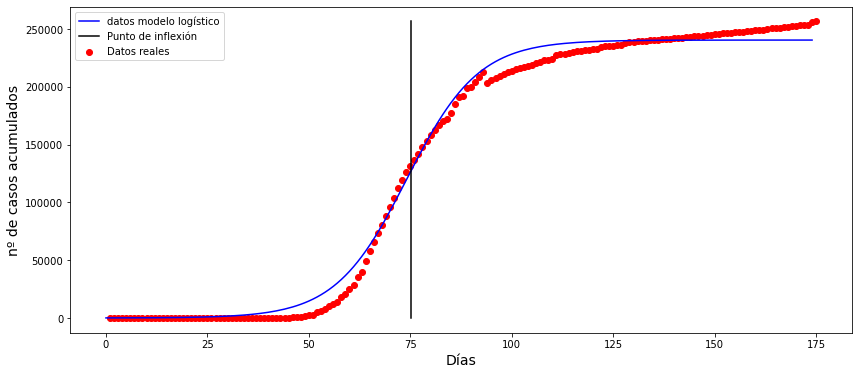

In [12]:
xData=np.array(Spain_Data["Días"][0:175])
yData=np.array(Spain_Data["Total Confirmados"][0:175])
#Ajuste de la ecuación a la evolución de los datos pasandole xData=t e yData=N
#Curve_fit, busca el valor del resto de parámetros, minimizando el error
popt,pcov=curve_fit(func,xData,yData)
print(popt)

Lista_one=np.ones(len(yData))*popt[1]

xFit=np.arange(0,175,1)
fig, ax=plt.subplots(figsize=(14,6))
ax.scatter(xData,yData,marker='o',color='red',label='Datos reales')
ax.set_xlabel("Días").set_fontsize(14)
ax.set_ylabel("nº de casos acumulados").set_fontsize(14)
ax.plot(xFit, func(xData,*popt),'b',label='datos modelo logístico')
ax.plot(Lista_one, yData,'black',label='Punto de inflexión')
ax.legend(loc='upper left');

* N0=2.40521646e+05 (VALOR LÍMITE SUPERIOR)
* t0=7.51314380e+01 (El punto de inflección se produce en el transcurso del día 75)
* T=8.82531272e+00 (Crecimiento, decrecimiento de la curva)

In [13]:
#Cálculo de R^2
y_opt=func(xData,*popt)
R_mcl=r2_score(y_opt,yData)
R_mcl

0.9947703056662655

In [14]:
#Valor, Nuevos factores estadisticos
xData=np.array(Spain_Data["Días"][0:175])
yData=np.array(Spain_Data["Total Confirmados"][0:175])
SSD_mcl=np.sum((yData-y_opt)**2)
RSE_mcl=np.sqrt(SSD_mcl/(len(yData)-2))
y_mean=np.mean(yData)
error_mcl=(RSE_mcl/y_mean)*100
print("Desviación estandar: ", SSD_mcl)
print("Error estandar residual: ", RSE_mcl)
print("Valor medio: ", y_mean)
print("Porcentaje del error respecto al valor medio: ", error_mcl)

Desviación estandar:  10280545819.055107
Error estandar residual:  7708.769054872445
Valor medio:  136848.57142857142
Porcentaje del error respecto al valor medio:  5.633065054607504


In [15]:
#derivada de la función logística (Modelo logístico 1)
#De esta forma se comparará la evolución de los casos por día reales yla obtenida por el modelo
display(Math(r"N=\frac{N0}{1+exp{\frac{-(t-t0)}{T}}}"))
display(Math(r"\frac{dN}{dt}=\frac{N0 \cdot exp(\frac{-(t-t0)}{T})}{T \cdot (1+exp{\frac{-(t-t0)}{T}})^2}"))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [16]:
def funcdev(t,N0,t0,T):
    return (N0*np.exp(-(t-t0)/T))/(T*(1+np.exp(-(t-t0)/T))**2)

In [17]:
#Como en el dataset se dispone solo del valor acumulado de datos, se ha de obtener de estos 
#datos los casos reales diarios registrados
yData=np.array(Spain_Data["Total Confirmados"][0:175])

diarios=[]
n=len(yData)
lista_y=yData.tolist()
for i in range(n):
    resta=lista_y[n-1]-lista_y[n-2]
    diarios.append(resta)
    n=n-1
len(diarios)

175

In [18]:
diarios.reverse()
for n, i in enumerate(diarios):
    if i<0:
        diarios[n]=0

In [19]:
round(np.mean(diarios),2)

1525.86

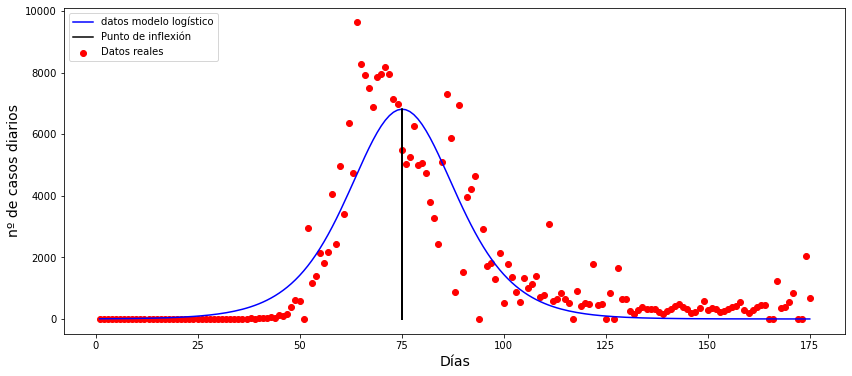

In [20]:
xData=np.array(Spain_Data["Días"][0:175])
ydev=funcdev(xData,popt[0],popt[1],popt[2])

Lista_one=np.ones(len(ydev))*popt[1]
fig, ax=plt.subplots(figsize=(14,6))
ax.plot(xData, ydev,'b',label='datos modelo logístico')
ax.plot(Lista_one, ydev,'black',label='Punto de inflexión')
ax.scatter(xData,diarios,marker='o',color='red',label='Datos reales')
ax.set_xlabel("Días").set_fontsize(14)
ax.set_ylabel("nº de casos diarios").set_fontsize(14)
ax.legend(loc='upper left');

### Conclusiones

* Con el modelo logístico de crecimiento , se observa que se ajusta bien al comportamiento de los datos
* De los coeficientes, se ha podido analizar el punto de inflexión (se da en el día 75)
* Se ha obtenido el caeficiente o factor de crecimieto de la pandemia en España durante la primera ola, el cual se puede comparar con el de otros países para llegar a plantearse diferentes hipótesis (8.82531272e+00 (Crecimiento, decrecimiento de la curva))
* Se ha obtenido el factor N0=2.40521646e+05 (VALOR LÍMITE SUPERIOR). El cual depende de diferentes factores de la población, así como de las decisiones tomadas durante el transcurso de la pandemia en la primera ola.
* Se ha obtenido la derivada de la función logística, para así estimar la evolución de los casos díarios y compararlos con la evolución real.